# CMP3751M - Machine Learning Task 2: AMB19705060

### Import the neccessary libraries

In [1]:
#import neccesary raries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import random as rd   
import pandas as pd
import math

### Define the needful global variables

In [2]:
centroids= []
dataset = pd.read_csv('Task2 - dataset - dog_breeds.csv')

### Retreive the required arrays; height, leg_length, tail_length and nose circumference

In [3]:
leg_length = dataset['leg length'].values
tail_length = dataset['tail length'].values
# nose_circumference = dataset['nose circumference'].values
height = dataset['height'].values

In [4]:
def acquire_data():
    dataset = pd.read_csv('Task2 - dataset - dog_breeds.csv')
    #dataset = pd.read_csv('Task2 - dataset - dog_breeds.csv', header = None).values
    return dataset

In [5]:
file = acquire_data()
# print the length of data
print("There are {} samples".format(len(file)))

#shape of values
height.shape
tail_length.shape
leg_length.shape
    
#stack the values    
heightXtail = np.vstack((height, tail_length)).T
heightXleg = np.vstack((height, leg_length)).T

There are 300 samples


## Section 2.1: Implementation of the K-Means Clustering (15%).

The compute_euclidean_distance is used to compute a set of vectors to calculate the distance between centroids

In [6]:
'The function compute_euclidean_distance() calculates the distance of two vectors, e.g., Euclidean distance '
def compute_euclidean_distance(vec_1, vec_2):
# distance is define eucledian distance formula  √(𝑝1 − 𝑐1)2 + (𝑝2 − 𝑐2)2 + ⋯ + (𝑝𝑑 − 𝑐𝑑)2
#vec_1 and vec_2 are centroid's vector position
  #  distance = math.sqrt(np.sum((vec_1-vec_2)**2,axis=1))
    distance = np.sqrt(np.sum((vec_2-vec_1)**2,axis=1))
  #  distance = np.linalg.norm(vec_2 - vec_1, axis=1)
    return distance

In [7]:
#count the no of clusters


#Takes k range
def cluster_count(rangeOfCentroid, cluster, k):
    count_cluster = 0
    for i in range(k):
        cluster_objective = cluster[i+1]      
        for data in cluster_objective:
            count_cluster += np.sum((data - rangeOfCentroid[i]) ** 2)
    return count_cluster

In [8]:
'randomly initialzies centroids'
def initialise_centroids(dataset, k):
    for cluster in range(k):
        centroids = dataset[np.random.randint(dataset.shape[0], size=k)]        
    return centroids[:k]

In [9]:
#update functi
def update(k,cluster_assignTemp, dataset, euc_distance, centroids):

    for cluster in range(k):
        euc_distance=np.c_[euc_distance, compute_euclidean_distance(dataset,centroids[cluster])]

    indexForCluster=np.argmin(euc_distance,axis=1)+1

    for cluster in range(k):
        cluster_assignTemp[cluster+1]=np.array([]).reshape(2,0)
    return indexForCluster


In [10]:
#Error Line Plot preparation
def objective(indexForCluster, cluster_assignTemp, dataset, k, centroids):

    for i in range(dataset.shape[0]):
        cluster_assignTemp[indexForCluster[i]]=np.c_[cluster_assignTemp[indexForCluster[i]],dataset[i]]

    for cluster in range(k):
        cluster_assignTemp[cluster+1]=cluster_assignTemp[cluster+1].T

    for cluster in range(k):
        centroids[cluster]=np.mean(cluster_assignTemp[cluster+1],axis=0)
        
#    for i in range(1,k):
#        centroid, cluster_assignTemp = kmeans(centroid, i)
#        objective.append(np.min(centroid))        

In [11]:
#K means clustering data from dataset into k groups

def kmeans(dataset, k):
    #initialize the centroids
    centroids = initialise_centroids(dataset,k)
    
    clusterAssigned = np.zeros(dataset.shape[0], dtype=np.float64)
    cluster_assigned = []


    for i in range(len(dataset)):
        distances=np.array([]).reshape(dataset.shape[0],0)     
        cluster_assignTemp={} #cluster_assignTemp

        indexForCluster = update(k, cluster_assignTemp, dataset, distances, centroids)
        objective(indexForCluster, cluster_assignTemp, dataset, k, centroids)          
        state = cluster_count(centroids, cluster_assignTemp, k)
        cluster_assigned.append(state)

    return centroids, cluster_assignTemp, cluster_assigned

### Section 2.2: clustering the dog breed data (15%).

#### Task a)

In [12]:
def heightXtailPlot(centroids, clusters, elements, k):
    plt.figure()
    
    for i in range(k):
        plt.scatter(centroids[i+1][:,0],centroids[i+1][:,1],s=15,c=colour[i],label=graphLabel[i], alpha=0.5)
        ##plt.scatter(centroids[:,0], centroids[:,1], color=colorCentre)        
        plt.scatter(clusters[i][0],clusters[i][1], marker = "*",s=350 , c="purple", label="Centroid {}".format(i+1),alpha=0.5)

        
    plt.xlabel('Height')
    plt.ylabel('Tail Length')    
    plt.legend(loc = 'lower right')
    plt.title("K Means for {}".format(k))
    plt.show()
    


#### Task c)

In [13]:
' Objective error function, to show decresing trend at each iteration when training model'
def objective_plot(cluster_assigned,k): #objective_plot
    plt.figure()
    plt.plot([i for i in range(len(cluster_assigned))], cluster_assigned, c='y')
    plt.title("Objective function Plot")
    plt.xlabel('Iteration step')
    plt.ylabel('Objective value')
 #   plt.show()

In [14]:
#Setting the colour
colour=['coral','darkgreen','cyan']
graphLabel=['Cluster: 1','Cluster: 2','Cluster: 3']

# Not to re-run your algorithm for each plot
kmeans_parameter = [2,3] #plotting k means at 2,3.


#Parameter values for K-Means
#when K MEAN is 2 and 3 for height x tail length
Centroid_range, centroidXcluster, rangeCount = kmeans(heightXtail, 2)
Centroid_range, centroidXcluster, rangeCount = kmeans(heightXtail, 3)


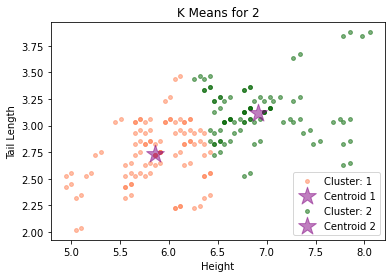

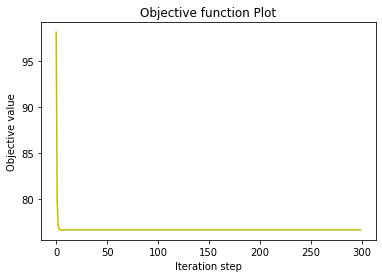

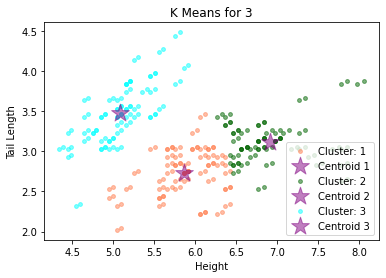

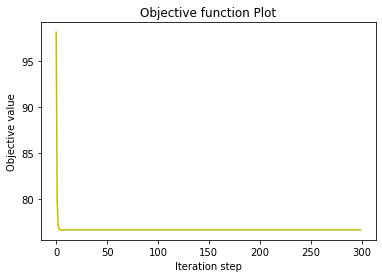

In [15]:
#for f in title:
for k in kmeans_parameter:
    heightXtailPlot(centroidXcluster, Centroid_range,k,k)

# Line plot for iteration step against objective function value
    objective_plot(rangeCount,k)

#### Task b)

Since there are two k values, you should run your k-means ONLY TWICE

In [16]:
##This is the second attempt for heightXleg length k means plot
def heightlegPlot(centroids, clusters, elements, k):
    plt.figure()
    
    for i in range(k):
        plt.scatter(centroids[i+1][:,0],centroids[i+1][:,1],s=15,c=colour[i],label=graphLabel[i], alpha=0.5)
        ##plt.scatter(centroids[:,0], centroids[:,1], color=colorCentre)        
        plt.scatter(clusters[i][0],clusters[i][1], marker = "*",s=350 , c="purple", label="Centroid {}".format(i+1),alpha=0.5)

        
    plt.xlabel('Height')
    plt.ylabel('Leg Length')    
    plt.legend(loc = 'lower right')
    plt.title("K Means for {}".format(k))
    plt.show()
    


In [17]:
#for height x leg length , k mean at 2 &3
Centroid_range, centroidXcluster, rangeCount = kmeans(heightXleg, 2)
Centroid_range, centroidXcluster, rangeCount = kmeans(heightXleg, 3)

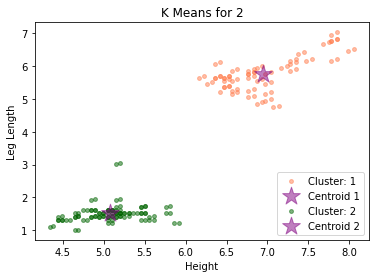

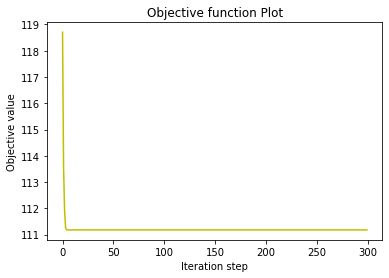

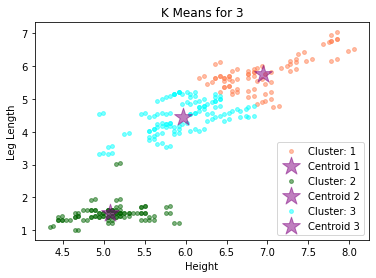

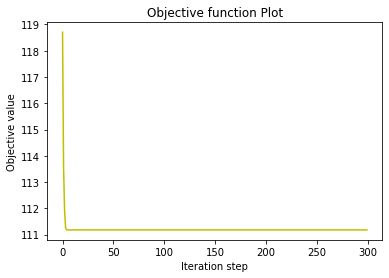

In [18]:
#for f in title:
for k in kmeans_parameter:
    heightlegPlot(centroidXcluster, Centroid_range,k,k)
    plt.show()

# Line plot for iteration step against objective function value
    objective_plot(rangeCount,k)